In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageOps
import tensorflow as tf
import pickle
import matplotlib.image as mpimg

In [34]:
with open("indices_to_class_labels_dict.json", "rb") as pickle_file:
    indices_to_class_labels_dict = pd.read_pickle(pickle_file)

In [35]:
print(len(indices_to_class_labels_dict))
print(indices_to_class_labels_dict)

5794
{0: '100028', 1: '100082', 2: '100131', 3: '100192', 4: '100230', 5: '100372', 6: '100407', 7: '100474', 8: '100484', 9: '100505', 10: '100533', 11: '10057', 12: '100614', 13: '100631', 14: '100674', 15: '10071', 16: '100719', 17: '100740', 18: '100820', 19: '100825', 20: '100826', 21: '100847', 22: '100895', 23: '10090', 24: '100914', 25: '100951', 26: '100955', 27: '100966', 28: '100982', 29: '101043', 30: '101049', 31: '101056', 32: '101112', 33: '101128', 34: '101138', 35: '10116', 36: '101176', 37: '101236', 38: '101241', 39: '101271', 40: '101301', 41: '101318', 42: '101339', 43: '101399', 44: '101400', 45: '101457', 46: '101462', 47: '101530', 48: '101615', 49: '101664', 50: '101708', 51: '101727', 52: '101857', 53: '101881', 54: '101923', 55: '101940', 56: '101946', 57: '102002', 58: '102062', 59: '102108', 60: '102146', 61: '102154', 62: '10217', 63: '102178', 64: '102206', 65: '102241', 66: '102320', 67: '102329', 68: '102375', 69: '102402', 70: '102416', 71: '10248', 72

In [36]:
history = tf.keras.models.load_model("group5_set224_resnet50_NO_imagenet_weights_07112020.h5")

In [37]:
# history = tf.keras.models.load_model("group5_set224_resnet50_NO_imagenet_weights_07112020.h5")

In [38]:
history.metrics_names

[]

In [39]:
def resize_image(path, new_width, new_height):
    image = Image.open(path)
    image = ImageOps.fit(image, (new_width, new_height), Image.ANTIALIAS)
    return image

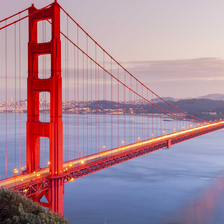

In [53]:
image = resize_image("test_images\\golden_gate1.jpg", 224, 224)
image

In [54]:
np_image = np.array(image)
print(np_image.shape)
np_image = np_image/255.0
image = np.expand_dims(np_image, axis=0)
result = history.predict(image)
# to_sort = result
# sorted_results = to_sort[0].sort()
predicted_class = indices_to_class_labels_dict[np.argmax(result)]
confidence_score = max(result[0])
print("Identified landmark for image is : {}".format(predicted_class))
print("Confidence score : ", confidence_score)
print("Whole Result array : ", result[0][-5:])

(224, 224, 3)
Identified landmark for image is : 198059
Confidence score :  1.0
Whole Result array :  [0. 0. 0. 0. 0.]


In [42]:
result[0][-5:]

array([0.00952964, 0.01354476, 0.05859386, 0.34007797, 0.5640576 ],
      dtype=float32)